# Primera pregunta
Sea $\alpha\colon I \to \mathbb{R}^3$ una curva parametrizada y sea $v\in \mathbb{R}$
un vector fijo. Si $\alpha'(t)$ es ortogonal a $v$ para todo $t\in I$ y $\alpha(0)$
también es ortogonal a $v$, demuestre que $\alpha(t)$ es ortogonal a $v$ para todo
$t\in I$.

## Solución

Sean $\alpha_1,\alpha_2,\alpha_3$ funciones $\mathbb{R}\to\mathbb{R}$ tales que:
$$
    \alpha(t) = (\alpha_1(t),\alpha_2(t),\alpha_3(t))
$$
para todo $t\in I$. Además, hagamos $v = (v_1,v_2,v_3)$.

Entonces la derivada de $\iprod{\alpha}{v}$ respecto de $t$ viene dada por:
\begin{align*}
    \iprod{\alpha(t)}{v}' &= \alpha_1'(t)v_1 + \alpha_2'(t)v_2 + \alpha_3'(t)v_3\\
                          &= \iprod{\alpha'(t)}{v}\\
                          &= 0
\end{align*}

Ahora integrando respecto de $t$ en un intervalo cualquiera $(0,x)\in I$, obtenemos:
\begin{align*}
    &\phantom{implies}
    \int_0^x \iprod{\alpha(t)}{v}' \;\mathrm{d}t = \int_0^x \alpha_1'(t)v_1 + \alpha_2'(t)v_2 + \alpha_3'(t)v_3 \;\mathrm{d}t = 0\\
    &\implies 
    v_1\int_0^x \alpha_1'(t) \;\mathrm{d}t + v_2\int_0^x \alpha_2'(t) \;\mathrm{d}t + v_3\int_0^x \alpha_3'(t) \;\mathrm{d}t = 0\\
    &\implies 
    v_1 (\alpha_1(x)-\alpha_1(0)) + v_2 (\alpha_2(x)-\alpha_2(0)) + v_3 (\alpha_3(x)-\alpha_3(0)) = 0 \\
    &\implies
    \iprod{\alpha(x)}{v} - \iprod{\alpha(0)}{v} = 0\\
    &\implies
    \iprod{\alpha(x)}{v} = 0.
\end{align*}



# Segunda Pregunta

## Solución

### Parametrizada por longitud de arco

Basta con revisar que la norma de $\alpha'$ es $1$, pues en ese caso $s = L(t) = t-t_0$. Para los cálculos usaremos la librería sympy de python.

In [1]:
# Import required libraries
from sympy import *
from sympy.vector import *
from sympy.plotting import *
from matplotlib import *

Generemos unos gráficos para ver el trazo de $\alpha$. Primero (en negro) los valores $a = b = 1$, luego (en azul) los valores $a=1/2, b=1$ y por último (en rojo) $a = 1, b = 1/2$.

*Nota:* en el código se usa $r$ en vez de $\alpha$ para hacer más sencilla la escritura.

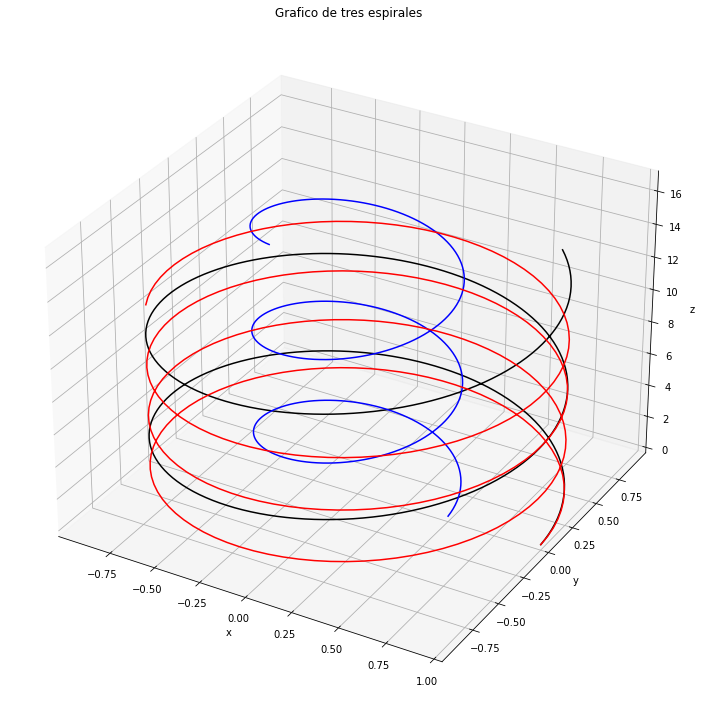

In [28]:
r,a,b,s,x,y,z = symbols('r,a,b,s,x,y,z')

# Subtitute c = sqrt(a^2+b^2) to make computations simpler
x = a*cos(s/sqrt(a**2+b**2))
y = a*sin(s/sqrt(a**2+b**2))
z = b*s/sqrt(a**2+b**2)

rcParams['figure.figsize'] = 10, 10

p = plot3d_parametric_line(
    (
        x.subs([(a,1),(b,1)]),
        y.subs([(a,1),(b,1)]),
        z.subs([(a,1),(b,1)]),
        (s,0,6*pi)
    ),
    (
        x.subs([(a,1/2),(b,1)]),
        y.subs([(a,1/2),(b,1)]),
        z.subs([(a,1/2),(b,1)]),
        (s,0,6*pi),
    ),
    (
        x.subs([(a,1),(b,1/2)]),
        y.subs([(a,1),(b,1/2)]),
        z.subs([(a,1),(b,1/2)]),
        (s,0,8*pi),
    ),
    show=False,
    title='Grafico de tres espirales',
)

p[0].line_color='black'
p[1].line_color='blue'
p[2].line_color='red'
p.show()

Calculemos ahora $\alpha'$.

In [6]:
r = Matrix([x,y,z])

drds = diff(r,s)
drds

Matrix([
[-a*sin(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[ a*cos(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[                          b/sqrt(a**2 + b**2)]])

Podemos obtener su norma y simplificar.

In [7]:
normdrds = sqrt(drds.dot(drds))
normdrds

sqrt(a**2*sin(s/sqrt(a**2 + b**2))**2/(a**2 + b**2) + a**2*cos(s/sqrt(a**2 + b**2))**2/(a**2 + b**2) + b**2/(a**2 + b**2))

In [8]:
simplify(normdrds)

1

Con lo que la norma es $1$, que es lo que queríamos demostrar.

### Curvatura y torsión

La curvatura es la norma de la derivada segunda de $\alpha$ con respecto de $s$. Primero calculamos $\alpha''$ y luego su norma:

In [9]:
ddrdss = diff(drds,s)
ddrdss

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/(a**2 + b**2)],
[-a*sin(s/sqrt(a**2 + b**2))/(a**2 + b**2)],
[                                        0]])

In [10]:
normddrdss = sqrt(ddrdss.dot(ddrdss))
normddrdss

sqrt(a**2*sin(s/sqrt(a**2 + b**2))**2/(a**2 + b**2)**2 + a**2*cos(s/sqrt(a**2 + b**2))**2/(a**2 + b**2)**2)

In [11]:
simplify(normddrdss)

sqrt(a**2/(a**2 + b**2)**2)

La expresión anterior nos da la curvatura de $\alpha$.

La torsión es el múltiplo escalar por el que diferen el vector normal y la primera derivada del vector binormal. Podemos comparar ambos vectores para conseguir ese múltiplo. Calculamos primero el vector normal:

In [12]:
normddrdss = simplify(normddrdss) # Take the second derivative to be its simplified form
n = ddrdss/normddrdss
n

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[-a*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[                                                                      0]])

Calculamos ahora el vector tangente usando la primera derivada:

In [13]:
normdrds = simplify(normdrds)
t = drds/normdrds
t

Matrix([
[-a*sin(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[ a*cos(s/sqrt(a**2 + b**2))/sqrt(a**2 + b**2)],
[                          b/sqrt(a**2 + b**2)]])

Podemos entonces calcular el vector binormal y simplificarlo:

In [14]:
bi = t.cross(n)
bi

Matrix([
[                                                                                          a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))],
[                                                                                         -a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))],
[a**2*sin(s/sqrt(a**2 + b**2))**2/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2)) + a**2*cos(s/sqrt(a**2 + b**2))**2/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))]])

In [15]:
simplify(bi)

Matrix([
[ a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))],
[-a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))],
[                         a**2/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**(3/2))]])

Solo falta la derivada del vector binormal:

In [16]:
bi = simplify(bi)
dbids = diff(bi,s)
dbids

Matrix([
[a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**2)],
[a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**2)],
[                                                                          0]])

Podemos entonces comparar $b'$ con $n$:

In [17]:
display(Eq(dbids,n))

Eq(Matrix([
[a*b*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**2)],
[a*b*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2)**2)],
[                                                                          0]]), Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[-a*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[                                                                      0]]))

De donde podemos ver que la torsión es:
$$
    \frac{b}{a^2+b^2}
$$

### Plano osculante

En la ecuación del plano en el punto $s = (s_1,s_2,s_3)$:
$$
    a (x-s_1) + b (y-s_2) + c(z-s_3),
$$
los coeficientes $a,b,c$ coinciden con los del vector normal:

In [18]:
n

Matrix([
[-a*cos(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[-a*sin(s/sqrt(a**2 + b**2))/(sqrt(a**2/(a**2 + b**2)**2)*(a**2 + b**2))],
[                                                                      0]])

## Tercera pregunta

Veamos primero el trazo de la curva $\alpha$.

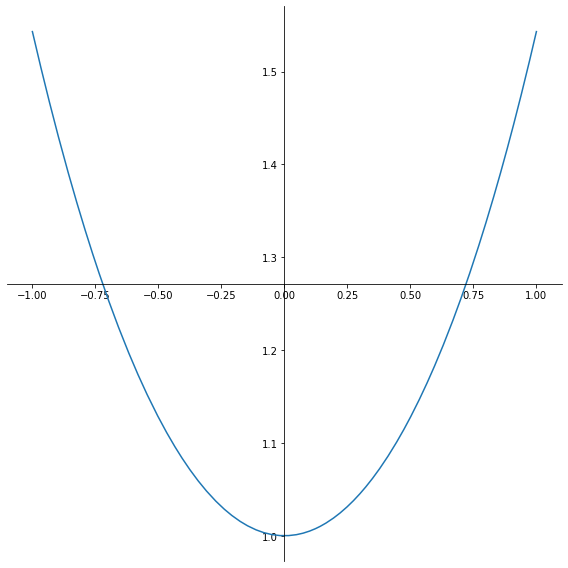

In [41]:
t = symbols('t')

x = t
y = (exp(t)+exp(-t))/2

rcParams['figure.figsize'] = 8, 8

plot_parametric(
    (x, y, (t, -1, 1)),
)

### Parametrización por longitud de arco

Calculamos primero $\alpha'$:

In [51]:
dxdt = diff(x,t)
dydt = diff(y,t)
display(dxds,dyds)

1

exp(t)/2 - exp(-t)/2

Luego, su norma:

In [52]:
normdrdt = sqrt(dxdt**2 + dydt**2)
normdrdt

sqrt((exp(t)/2 - exp(-t)/2)**2 + 1)

In [57]:
simplify(normdrdt)

sqrt(2*cosh(2*t) + 2)/2

In [56]:
integrate(sqrt(dxdt**2 + dydt**2), t)

Integral(sqrt(exp(2*t) + 2 + exp(-2*t)), t)/2